In [32]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt

In [50]:
M = 21
N = 3
num_dados = 2*M + 1
grau = N + 1

A = np.zeros((num_dados, grau))

for n in range(A.shape[0]):
    for i in range(A.shape[1]):
        A[n, i] = (n-M)**i

print(A)
H = np.linalg.inv(A.transpose() @ A) @ A.transpose()

[[ 1.000e+00 -2.100e+01  4.410e+02 -9.261e+03]
 [ 1.000e+00 -2.000e+01  4.000e+02 -8.000e+03]
 [ 1.000e+00 -1.900e+01  3.610e+02 -6.859e+03]
 [ 1.000e+00 -1.800e+01  3.240e+02 -5.832e+03]
 [ 1.000e+00 -1.700e+01  2.890e+02 -4.913e+03]
 [ 1.000e+00 -1.600e+01  2.560e+02 -4.096e+03]
 [ 1.000e+00 -1.500e+01  2.250e+02 -3.375e+03]
 [ 1.000e+00 -1.400e+01  1.960e+02 -2.744e+03]
 [ 1.000e+00 -1.300e+01  1.690e+02 -2.197e+03]
 [ 1.000e+00 -1.200e+01  1.440e+02 -1.728e+03]
 [ 1.000e+00 -1.100e+01  1.210e+02 -1.331e+03]
 [ 1.000e+00 -1.000e+01  1.000e+02 -1.000e+03]
 [ 1.000e+00 -9.000e+00  8.100e+01 -7.290e+02]
 [ 1.000e+00 -8.000e+00  6.400e+01 -5.120e+02]
 [ 1.000e+00 -7.000e+00  4.900e+01 -3.430e+02]
 [ 1.000e+00 -6.000e+00  3.600e+01 -2.160e+02]
 [ 1.000e+00 -5.000e+00  2.500e+01 -1.250e+02]
 [ 1.000e+00 -4.000e+00  1.600e+01 -6.400e+01]
 [ 1.000e+00 -3.000e+00  9.000e+00 -2.700e+01]
 [ 1.000e+00 -2.000e+00  4.000e+00 -8.000e+00]
 [ 1.000e+00 -1.000e+00  1.000e+00 -1.000e+00]
 [ 1.000e+00 

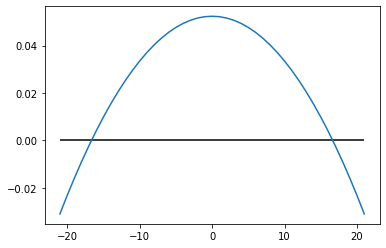

In [51]:
x = np.array([i for i in range(-M, M+1)])

plt.hlines(0,x.min(), x.max(), color="black")
plt.plot(x, H[0, :])

/home/felipeangelim/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


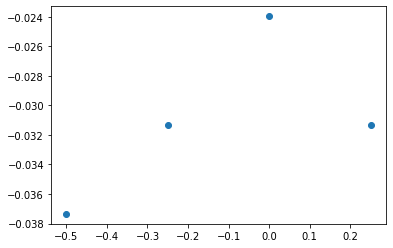

In [52]:
h = fftshift(fft(H[:, 0]))
f = fftshift(fftfreq(h.shape[0]))
plt.scatter(f, h)